In [20]:
import talib as ta
import numpy as np
import pandas as pd

df4 = pd.read_csv('kospi.csv')

In [21]:
def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df
# scaling_col = [column for column in df4.columns]
# scaling_col.pop(0)

scaling_col = [column for column in df4.columns.difference(['date','kospi_label'])]

df_rev = df4.copy()
df_rev = df_rev.dropna()
feature_scaling(df_rev, scaling_strategy="z-score", column=scaling_col)
df_rev.to_csv("kospi_label_2.csv", mode='w', index=False)

In [10]:
df4['kospi_label'] = df4['kospi_label'].astype("category")
df4 = df4.dropna()

# 보조지표 추가
# 1) 이평선(SMA, EMA, WMA) (w = 5,10,15,20,30,60,120)
df4['ma_5'] = ta.SMA(df4.kospi_close, timeperiod=5)
df4['ma_10'] = ta.SMA(df4.kospi_close, timeperiod=10)
df4['ma_15'] = ta.SMA(df4.kospi_close, timeperiod=15)
df4['ma_20'] = ta.SMA(df4.kospi_close, timeperiod=20)
df4['ma_30'] = ta.SMA(df4.kospi_close, timeperiod=30)
df4['ma_60'] = ta.SMA(df4.kospi_close, timeperiod=60)
df4['ma_120'] = ta.SMA(df4.kospi_close, timeperiod=120)

df4['ema_5'] = ta.EMA(df4.kospi_close, timeperiod=5)
df4['ema_10'] = ta.EMA(df4.kospi_close, timeperiod=10)
df4['ema_15'] = ta.EMA(df4.kospi_close, timeperiod=15)
df4['ema_20'] = ta.EMA(df4.kospi_close, timeperiod=20)
df4['ema_30'] = ta.EMA(df4.kospi_close, timeperiod=30)
df4['ema_60'] = ta.EMA(df4.kospi_close, timeperiod=60)
df4['ema_120'] = ta.EMA(df4.kospi_close, timeperiod=120)

df4['wma_5'] = ta.WMA(df4.kospi_close, timeperiod=5)
df4['wma_10'] = ta.WMA(df4.kospi_close, timeperiod=10)
df4['wma_15'] = ta.WMA(df4.kospi_close, timeperiod=15)
df4['wma_20'] = ta.WMA(df4.kospi_close, timeperiod=20)
df4['wma_30'] = ta.WMA(df4.kospi_close, timeperiod=30)
df4['wma_60'] = ta.WMA(df4.kospi_close, timeperiod=60)
df4['wma_120'] = ta.WMA(df4.kospi_close, timeperiod=120)

df4['ma_v5'] = ta.SMA(df4.kospi_volume, timeperiod=5)
df4['ma_v10'] = ta.SMA(df4.kospi_volume, timeperiod=10)
df4['ma_v20'] = ta.SMA(df4.kospi_volume, timeperiod=20)
df4['ma_v60'] = ta.SMA(df4.kospi_volume, timeperiod=60)
df4['ma_v120'] = ta.SMA(df4.kospi_volume, timeperiod=120)

In [11]:
# 2) 볼린저밴드 (주가의 이동평균선을 중심으로 표준편차 범위를 표시)
ubb, mbb, lbb = ta.BBANDS(df4.kospi_close, 20, 2)
df4['ubb'] = ubb
df4['mbb'] = mbb
df4['lbb'] = lbb

In [12]:
# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(df4.kospi_close, fastperiod=12, slowperiod=26, signalperiod=9)
df4['macd'] = macd
df4['macdsignal9'] = macdsignal9
df4['macdhist'] = macdhist

In [13]:
# 4) RSI 상대강도지수 - 추세의 강도 파악, 과매수, 과매도 국면 판단
df4['rsi'] = ta.RSI(df4.kospi_close, timeperiod=14)

In [14]:
# 5) 스토캐스틱 오늘의 주가가 일정 동안 주가의 변동폭 중에서 어느 정도인 지?
slowk, slowd = ta.STOCH(df4.kospi_high, df4.kospi_low, df4.kospi_close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
fastk, fastd = ta.STOCHF(df4.kospi_high, df4.kospi_low, df4.kospi_close, fastk_period=5, fastd_period=3, fastd_matype=0)
fastk_rsi, fastd_rsi = ta.STOCHRSI(df4.kospi_close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
df4['slowk'] = slowk
df4['slowd'] = slowd
df4['fastk'] = fastk
df4['fastd'] = fastd
df4['fastk_rsi'] = fastk_rsi
df4['fastd_rsi'] = fastd_rsi

In [15]:
# 6) 기타 자주 사용되는 것들
# CCI (Commodity Channel Index), williams'%R, parabolic SAR
# ADX (Average Directional Movement Index)
# plusDI(Plus Directional Indicator), plusDM Plus Directional Movement)
# ATR (Average True Range), OBV (On Balance Volume) 거래량 분석을 통한 주가분석, Variance
df4['cci'] = ta.CCI(df4.kospi_high, df4.kospi_low, df4.kospi_close, timeperiod=14)
df4['willR'] = ta.WILLR(df4.kospi_high, df4.kospi_low, df4.kospi_close, timeperiod=14)
df4['sar'] = ta.SAR(df4.kospi_high, df4.kospi_low, acceleration=0, maximum=0)
df4['adx'] = ta.ADX(df4.kospi_high, df4.kospi_low, df4.kospi_close, timeperiod=14)
df4['plus_di'] = ta.PLUS_DI(df4.kospi_high, df4.kospi_low, df4.kospi_close, timeperiod=14)
df4['plus_dm'] = ta.PLUS_DM(df4.kospi_high, df4.kospi_low, timeperiod=14)
df4['atr'] = ta.ATR(df4.kospi_high, df4.kospi_low, df4.kospi_close, timeperiod=14)
df4['obv'] = ta.OBV(df4.kospi_close, df4.kospi_volume)
df4['var'] = ta.VAR(df4.kospi_close, timeperiod=5, nbdev=1)

In [213]:
# 7) Pattern REcognition
# Investopedia "The 5 Most Powerful Candlestick Patterns"
# Three Line Strike, Three Black Crows
# Evening Star, Abandoned Baby
# df4['line_str'] = ta.CDL3LINESTRIKE(df4.kospi_open, df4.kospi_high, df4.kospi_low, df4.kospi_close)
# df4['blk_crw'] = ta.CDL3BLACKCROWS(df4.kospi_open, df4.kospi_high, df4.kospi_low, df4.kospi_close)
# df4['evn_star'] = ta.CDLEVENINGSTAR(df4.kospi_open, df4.kospi_high, df4.kospi_low, df4.kospi_close, penetration=0)
# df4['abn_baby'] = ta.CDLABANDONEDBABY(df4.kospi_open, df4.kospi_high, df4.kospi_low, df4.kospi_close, penetration=0)

In [16]:
df4.to_csv("kopsi_label_1.csv", mode='w', index=False)

In [17]:
def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df
# scaling_col = [column for column in df4.columns]
# scaling_col.pop(0)

scaling_col = [column for column in df4.columns.difference(['date','kospi_label'])]

df_rev = df4.copy()
df_rev = df_rev.dropna()
feature_scaling(df_rev, scaling_strategy="z-score", column=scaling_col)
df_rev.to_csv("kospi_label_2.csv", mode='w', index=False)

In [18]:
result = [column for column in df_rev.columns]
print(result)
print(len(result))

['date', 'kospi_close', 'kospi_dividend_yield_ratio', 'kospi_per', 'kospi_pbr', 'kospi_open', 'kospi_high', 'kospi_low', 'kospi_volume', 'kospi_value', 'kospi_stock_value', 'kospi_label', 'ma_5', 'ma_10', 'ma_15', 'ma_20', 'ma_30', 'ma_60', 'ma_120', 'ema_5', 'ema_10', 'ema_15', 'ema_20', 'ema_30', 'ema_60', 'ema_120', 'wma_5', 'wma_10', 'wma_15', 'wma_20', 'wma_30', 'wma_60', 'wma_120', 'ma_v5', 'ma_v10', 'ma_v20', 'ma_v60', 'ma_v120', 'ubb', 'mbb', 'lbb', 'macd', 'macdsignal9', 'macdhist', 'rsi', 'slowk', 'slowd', 'fastk', 'fastd', 'fastk_rsi', 'fastd_rsi', 'cci', 'willR', 'sar', 'adx', 'plus_di', 'plus_dm', 'atr', 'obv', 'var']
60


In [37]:
# 상관계수
corr = df_rev.corr(method='pearson')

corr.to_csv("corr_kospi_label.csv", mode='w')

In [3]:
# 전처리 모델
# 데이터 불러오기

# 환율
usd = pd.read_csv('C:/Users/user/kospi/exchange_rate/usd.csv')
eur = pd.read_csv('C:/Users/user/kospi/exchange_rate/eur.csv')
jpy = pd.read_csv('C:/Users/user/kospi/exchange_rate/jpy.csv')
ex_won = pd.read_csv('C:/Users/user/kospi/exchange_rate/exchange_rate_won.csv')

# 금값시세
krx_gold = pd.read_csv('C:/Users/user/kospi/gold/krx_gold.csv')
krx_mini_gold = pd.read_csv('C:/Users/user/kospi/gold/krx_mini_gold.csv')
world_gold = pd.read_csv('C:/Users/user/kospi/gold/world_gold.csv')

# 금리 (기준금리, 콜금리, KORIBOR, CD수익률, 통안증권수익률, 국고채수익률, 회사채수익률)
market_rate = pd.read_csv('C:/Users/user/kospi/interest_rate/market_rate.csv')

# 유가
krx_diesel = pd.read_csv('C:/Users/user/kospi/oil/krx_diesel.csv')
krx_gasoline = pd.read_csv('C:/Users/user/kospi/oil/krx_gasoline.csv')
krx_kerosene = pd.read_csv('C:/Users/user/kospi/oil/krx_kerosene.csv')
korea_station_diesel = pd.read_csv('C:/Users/user/kospi/oil/korea_station_diesel.csv')
korea_station_gasoline = pd.read_csv('C:/Users/user/kospi/oil/korea_station_gasoline.csv')

# 배출권
koc = pd.read_csv('C:/Users/user/kospi/emission/koc.csv')

# 글로벌 지수
vix = pd.read_csv('C:/Users/user/kospi/world_indices/vix_cboe volatility index.csv')
vkospi = pd.read_csv('C:/Users/user/kospi/world_indices/vkospi volatility.csv')
us_treasury_13w = pd.read_csv('C:/Users/user/kospi/world_indices/13 week treasury bill.csv')
us_treasury_5y = pd.read_csv('C:/Users/user/kospi/world_indices/treasury yield 5 years.csv')
us_treasury_10y = pd.read_csv('C:/Users/user/kospi/world_indices/treasury yield 10 years.csv')
us_treasury_30y = pd.read_csv('C:/Users/user/kospi/world_indices/treasury yield 30 years.csv')
usd_bitcoin = pd.read_csv('C:/Users/user/kospi/world_indices/bitcoin usd.csv')

gold = pd.read_csv('C:/Users/user/kospi/world_indices/gold.csv')
silver = pd.read_csv('C:/Users/user/kospi/world_indices/silver.csv')
platinum = pd.read_csv('C:/Users/user/kospi/world_indices/platinum.csv')
palladium = pd.read_csv('C:/Users/user/kospi/world_indices/palladium.csv')
copper = pd.read_csv('C:/Users/user/kospi/world_indices/copper.csv')

heating_oil = pd.read_csv('C:/Users/user/kospi/world_indices/heating oil.csv')
crude_oil = pd.read_csv('C:/Users/user/kospi/world_indices/crude oil.csv')
natural_gas = pd.read_csv('C:/Users/user/kospi/world_indices/natural gas.csv')
rbob_gasoline = pd.read_csv('C:/Users/user/kospi/world_indices/rbob gasoline.csv')

# 글로벌 주가지수
snp_500 = pd.read_csv('C:/Users/user/kospi/global_indices/s&p 500.csv')
dow_jones = pd.read_csv('C:/Users/user/kospi/global_indices/dow jones industrial average.csv')
nasdaq = pd.read_csv('C:/Users/user/kospi/global_indices/nasdaq composite.csv')
nyse = pd.read_csv('C:/Users/user/kospi/global_indices/nyse composite.csv')
nyse_amex = pd.read_csv('C:/Users/user/kospi/global_indices/nyse amex composite.csv')
russell_2000 = pd.read_csv('C:/Users/user/kospi/global_indices/russell 2000.csv')
dax = pd.read_csv('C:/Users/user/kospi/global_indices/dax performance.csv')
cac_40 = pd.read_csv('C:/Users/user/kospi/global_indices/cac 40.csv')
estx_50 = pd.read_csv('C:/Users/user/kospi/global_indices/estx 50 pr_eur.csv')
euronext_100 = pd.read_csv('C:/Users/user/kospi/global_indices/euronext 100.csv')
bel_20 = pd.read_csv('C:/Users/user/kospi/global_indices/brussels bel 20.csv')
moex_russia = pd.read_csv('C:/Users/user/kospi/global_indices/moex russia mcx.csv')
nikkei_225 = pd.read_csv('C:/Users/user/kospi/global_indices/nikkei 225.csv')
hang_seng = pd.read_csv('C:/Users/user/kospi/global_indices/hang seng.csv')
sse = pd.read_csv('C:/Users/user/kospi/global_indices/sse composite.csv')
shenzhen = pd.read_csv('C:/Users/user/kospi/global_indices/shenzhen component.csv')
snp_asx = pd.read_csv('C:/Users/user/kospi/global_indices/s&p_asx 200.csv')
snp_bse_sensex = pd.read_csv('C:/Users/user/kospi/global_indices/s&p_bse_sensex.csv')
jakarta = pd.read_csv('C:/Users/user/kospi/global_indices/jakarta composite.csv')
snp_nzx_50 = pd.read_csv('C:/Users/user/kospi/global_indices/s&p_nzx 50.csv')
tsec = pd.read_csv('C:/Users/user/kospi/global_indices/tsec weighted.csv')
snp_tsx = pd.read_csv('C:/Users/user/kospi/global_indices/s&p_tsx composite.csv')
ibovespa = pd.read_csv('C:/Users/user/kospi/global_indices/ibovespa.csv')
ipc_mexico = pd.read_csv('C:/Users/user/kospi/global_indices/ipc mexico.csv')
merval = pd.read_csv('C:/Users/user/kospi/global_indices/merval.csv')
ta_125 = pd.read_csv('C:/Users/user/kospi/global_indices/ta_125.csv')


In [8]:
# 조합 선택
# 1) 환율 + 금값시세 + 금리 + 유가 + 배출권
df = pd.read_csv('kospi.csv')
#df = pd.merge(df, usd, how='inner', on='date')
#df = pd.merge(df, eur, how='inner', on='date')
#df = pd.merge(df, jpy, how='inner', on='date')
#df = pd.merge(df, ex_won, how='inner', on='date')
#df = pd.merge(df, krx_gold, how='inner', on='date')
#df = pd.merge(df, world_gold, how='inner', on='date')
#df = pd.merge(df, market_rate, how='inner', on='date')
#df = pd.merge(df, krx_diesel, how='inner', on='date')
#df = pd.merge(df, krx_gasoline, how='inner', on='date')
#df = pd.merge(df, krx_kerosene, how='inner', on='date')
#df = pd.merge(df, koc, how='inner', on='date')

df = pd.merge(df, vix, how='inner', on='date')
df = pd.merge(df, vkospi, how='inner', on='date')
#df = pd.merge(df, us_treasury_13w, how='inner', on='date')
#df = pd.merge(df, us_treasury_5y, how='inner', on='date')
#df = pd.merge(df, us_treasury_10y, how='inner', on='date')
#df = pd.merge(df, us_treasury_30y, how='inner', on='date')

df = pd.merge(df, snp_500, how='inner', on='date')
df = pd.merge(df, dow_jones, how='inner', on='date')
df = pd.merge(df, nasdaq, how='inner', on='date')
df = pd.merge(df, nyse, how='inner', on='date')
df = pd.merge(df, nyse_amex, how='inner', on='date')
df = pd.merge(df, russell_2000, how='inner', on='date')
df = pd.merge(df, dax, how='inner', on='date')
df = pd.merge(df, nikkei_225, how='inner', on='date')
df = pd.merge(df, hang_seng, how='inner', on='date')
df = pd.merge(df, sse, how='inner', on='date')
df = pd.merge(df, estx_50, how='inner', on='date')
df = pd.merge(df, euronext_100, how='inner', on='date')

def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df

scaling_col = [column for column in df.columns.difference(['date','kospi_label'])]

df_rev = df.copy()
df_rev = df_rev.dropna()
feature_scaling(df_rev, scaling_strategy="z-score", column=scaling_col)
df_rev.to_csv("kospi_label_2.csv", mode='w', index=False)

# 2) 환율 + 금값시세 + 금리 + 유가 + 배출권 + 글로벌 지수 + 글로벌 주가지수
df2 = pd.merge(df, vix, how='inner', on='date')
df2 = pd.merge(df2, vkospi, how='inner', on='date')
df2 = pd.merge(df2, us_treasury_13w, how='inner', on='date')
df2 = pd.merge(df2, us_treasury_5y, how='inner', on='date')
df2 = pd.merge(df2, us_treasury_10y, how='inner', on='date')
df2 = pd.merge(df2, us_treasury_30y, how='inner', on='date')
df2 = pd.merge(df2, usd_bitcoin, how='inner', on='date')
df2 = pd.merge(df2, gold, how='inner', on='date')
df2 = pd.merge(df2, silver, how='inner', on='date')
df2 = pd.merge(df2, platinum, how='inner', on='date')
df2 = pd.merge(df2, palladium, how='inner', on='date')
df2 = pd.merge(df2, copper, how='inner', on='date')
df2 = pd.merge(df2, heating_oil, how='inner', on='date')
df2 = pd.merge(df2, crude_oil, how='inner', on='date')
df2 = pd.merge(df2, natural_gas, how='inner', on='date')
df2 = pd.merge(df2, rbob_gasoline, how='inner', on='date')

df2 = pd.merge(df2, snp_500, how='inner', on='date')
df2 = pd.merge(df2, dow_jones, how='inner', on='date')
df2 = pd.merge(df2, nasdaq, how='inner', on='date')
df2 = pd.merge(df2, nyse, how='inner', on='date')
df2 = pd.merge(df2, nyse_amex, how='inner', on='date')
df2 = pd.merge(df2, russell_2000, how='inner', on='date')
df2 = pd.merge(df2, dax, how='inner', on='date')
df2 = pd.merge(df2, cac_40, how='inner', on='date')
df2 = pd.merge(df2, estx_50, how='inner', on='date')
df2 = pd.merge(df2, euronext_100, how='inner', on='date')
df2 = pd.merge(df2, bel_20, how='inner', on='date')
df2 = pd.merge(df2, moex_russia, how='inner', on='date')
df2 = pd.merge(df2, nikkei_225, how='inner', on='date')
df2 = pd.merge(df2, hang_seng, how='inner', on='date')
df2 = pd.merge(df2, sse, how='inner', on='date')
df2 = pd.merge(df2, shenzhen, how='inner', on='date')
df2 = pd.merge(df2, snp_asx, how='inner', on='date')
df2 = pd.merge(df2, snp_bse_sensex, how='inner', on='date')
df2 = pd.merge(df2, jakarta, how='inner', on='date')
df2 = pd.merge(df2, snp_nzx_50, how='inner', on='date')
df2 = pd.merge(df2, tsec, how='inner', on='date')
df2 = pd.merge(df2, snp_tsx, how='inner', on='date')
df2 = pd.merge(df2, ibovespa, how='inner', on='date')
df2 = pd.merge(df2, ipc_mexico, how='inner', on='date')
df2 = pd.merge(df2, merval, how='inner', on='date')
df2 = pd.merge(df2, ta_125, how='inner', on='date')


In [221]:
# 분류 모델
import numpy as np
import pandas as pd

import sklearn
from sklearn.tree import DecisionTreeClassifier # 모델링
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import lightgbm as lgb

import os
import random # 시드 제어

import seaborn as sns # 시각화
import matplotlib.pyplot as plt # 시각화
import shap
import skimage

# 1) Decision Tree

# Set Random Seed
seed = 1
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
random.seed(seed)

In [226]:
# 3) lightGBM

# load dataset
X = df_rev[df_rev.columns.difference(['kospi_label'])]
# X = df_rev[df_rev.columns.difference(['kospi_close', 'kospi_label'])]
Y = df_rev['kospi_label']
# Y = df_rev['kospi_close']

X['date'] = X['date'].astype(float)

x_train, x_valtest, y_train, y_valtest = train_test_split(X, Y, test_size = 0.2, shuffle=False, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size = 0.5, shuffle=False, random_state=seed)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(357, 159) (357,) (45, 159) (45,) (45, 159) (45,)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [227]:
train_lgb = lgb.Dataset(x_train, label = y_train)
val_lgb = lgb.Dataset(x_val, label = y_val)
params = {'random_seed':seed, 'bagging_seed':seed,
          'feature_fraction_seed':seed, 'data_random_seed':seed,
          'drop_seed':seed,
          'num_iterations':1000, 'num_class':3,
          'boosting_type':'gbdt', 'objective':'multiclass',
          'learning_rate':0.05, 'num_leaves':100, 'max_depth':-1,
          'bagging_fraction':0.1, 'feature_fraction':0.8,
          'lambda_l1':0.0, 'lambda_l2':15.0, 'max_bin':300}
model = lgb.train(params, train_lgb, valid_sets = val_lgb,
                  num_boost_round = 2000, # early_stopping_rounds = 100,
                  verbose_eval = 200)

lgb_test, lgb_valid = model.predict(x_test), model.predict(x_val)
lgb_valid = [np.argmax(line) for line in lgb_valid]
lgb_test = [np.argmax(line) for line in lgb_test]

# predict과 test set의 score 계산
cfmat = confusion_matrix(y_test,lgb_test)
lgb_test_score, lgb_valid_score = accuracy_score(lgb_test, y_test), accuracy_score(lgb_valid, y_val)
print(cfmat)
print('result:')
print("val_acc= {0:.5f}".format(lgb_valid_score*100))
print("test_acc= {0:.5f}".format(lgb_test_score*100))

Found `num_iterations` in params. Will use it instead of argument


[200]	valid_0's multi_logloss: 0.284375
[400]	valid_0's multi_logloss: 0.278228
[600]	valid_0's multi_logloss: 0.28163
[800]	valid_0's multi_logloss: 0.280999
[1000]	valid_0's multi_logloss: 0.281661
[[27  3]
 [ 1 14]]
result:
val_acc= 91.11111
test_acc= 91.11111


In [223]:
train_lgb = lgb.Dataset(x_train, label = y_train)
val_lgb = lgb.Dataset(x_val, label = y_val)
params = {'random_seed':seed, 'bagging_seed':seed,
          'feature_fraction_seed':seed, 'data_random_seed':seed,
          'drop_seed':seed,
          'num_iterations':1000, #'n_estimators':1000,
          'boosting_type':'gbdt', 'objective':'huber',
          'learning_rate':0.05, 'num_leaves':100, 'max_depth':-1,
          'bagging_fraction':0.1, 'feature_fraction':0.8,
          'lambda_l1':0.0, 'lambda_l2':15.0, 'max_bin':300}
model = lgb.train(params, train_lgb, valid_sets = val_lgb,
                  num_boost_round = 2000, # early_stopping_rounds = 200,
                  verbose_eval = 200)

lgb_test, lgb_valid = model.predict(x_test), model.predict(x_val)

def smape(array_1, array_2):
    score = 100*np.mean(2*abs(array_1 - array_2)/(abs(array_1)+abs(array_2)))
    return score

# predict과 test set의 smape 계산
lgb_test_smape, lgb_valid_smape = smape(lgb_test, y_test), smape(lgb_valid, y_val)
print('result:')
print("val_SMAPE", lgb_valid_smape)
print("test_SMAPE", lgb_test_smape)

Found `num_iterations` in params. Will use it instead of argument


[200]	valid_0's huber: 0.016022
[400]	valid_0's huber: 0.0183125
[600]	valid_0's huber: 0.0191575
[800]	valid_0's huber: 0.0193114
[1000]	valid_0's huber: 0.0192868
result:
val_SMAPE 49.20671521784307
test_SMAPE 33.34448372840474


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


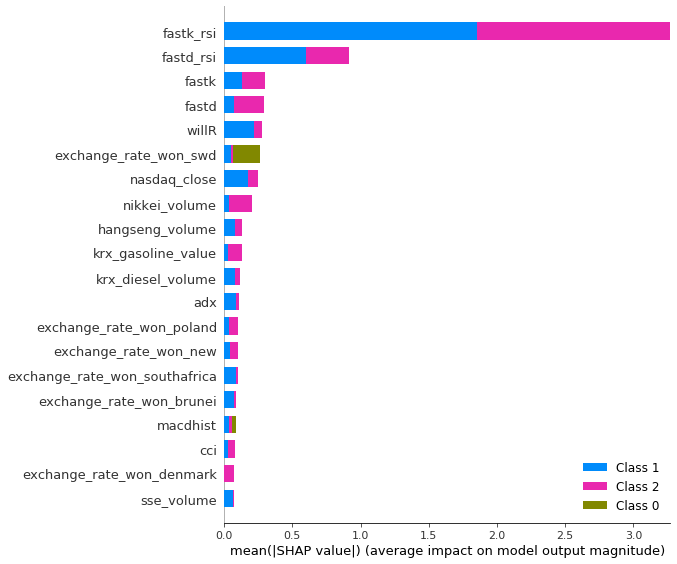

In [228]:
# 특성 중요도 검사 방법 2
explainer = shap.TreeExplainer(model) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(x_test) # Shap Values 계산
shap.summary_plot(shap_values, x_test, plot_type = "bar")

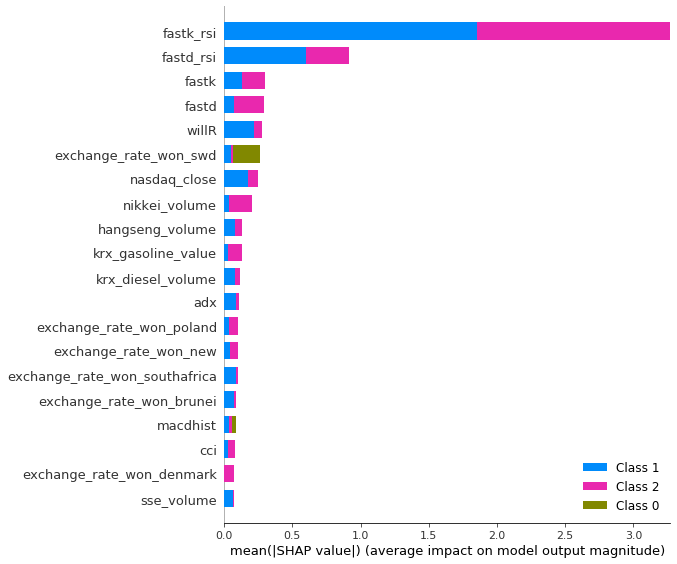

In [229]:
shap.summary_plot(shap_values, x_test)

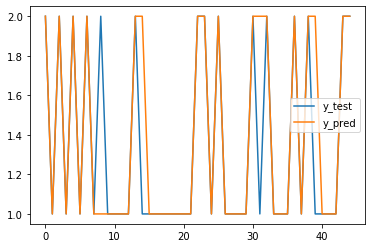

In [230]:
plt.plot(np.array(y_test), label='y_test')
plt.plot(lgb_test, label='y_pred')

plt.legend()
plt.show()

In [125]:
Imp = pd.DataFrame({'Importance':model.feature_importance()}, 
                          index = x_train.columns)
print(Imp.head())
Imp.to_csv("kospi_feature_importance_lgbm_reg.csv", mode='w')

            Importance
CD_91d              71
Volume              95
amex_close         132
base_rate            0
call_rate            2
